# 📘 Gyakorlat 1: Bevezetés a gépi tanulásba és lineáris regresszió

### 📌 Bevezetés: Mi az a gépi tanulás?

Machine learning: olyan alogritmusok, statisztikai metódusok elmélete melyekkel adatokból tudunk valamilyen "tudást", mögöttes mintázatot kinyerni.

Cél: olyan mintázat felismerése mely az adott típusú adatra generális, általános, tehát nem látott adatokra prediktív.


Formálisan:

- Bemenet: Adatok `X ∈ ℝⁿˣᵈ` és célértékek `y ∈ ℝⁿ`
- Modell: Egy paraméterezett függvény `f_θ : ℝᵈ → ℝ`
- Cél: Olyan `θ` paraméterek megtalálása, hogy `f_θ(x)` jól közelítse `y`-t.

### 🔢 Lineáris regresszió – az alapmodell

A legegyszerűbb modell a **lineáris regresszió**:

$$
f(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_d x_d = x^\top \theta
$$

A tanulás célja: minimalizálni a négyzetes veszteséget:

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - x^{(i)\top}\theta)^2
$$

Megoldás:

- Analitikusan:  
$$
\theta = (X^\top X)^{-1} X^\top y
$$
(amennyiben inverz létezik)

- Vagy: **iteratívan** gradiens módszerrel


### 🧪 Szintetikus adatok generálása

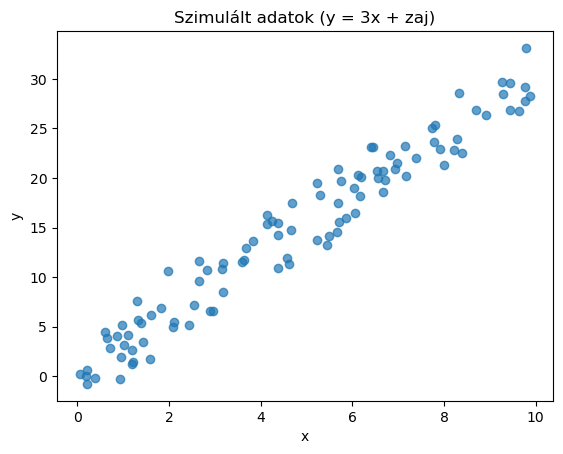

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Véletlenszerű, de reprodukálható
np.random.seed(0)

# 1D bemenet, 100 pont
X = np.random.rand(100) * 10  # X ∈ [0,10]

y = 3 * X + np.random.randn(100) * 2  # y = 3x + zaj

plt.scatter(X, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Szimulált adatok (y = 3x + zaj)")
plt.show()


In [ ]:
print(X.shape)
print(X.T.shape)
X.reshape(-1,1).shape

(100,)
(100,)


(100, 1, 1)

np.float64(2.005806808701897)

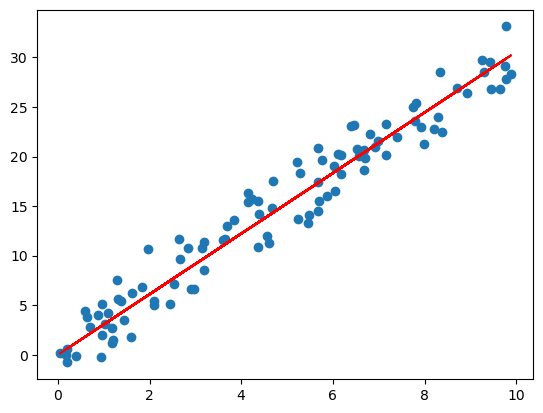

In [ ]:
#X-ből vektor
X_v=X.reshape(-1,1)

#analitikus megoldasa thetanak
theta=np.linalg.inv(X_v.T @ X_v) @ X_v.T @ y

#predikció
y_hat= X_v @ theta

#ábrázolás
plt.scatter(X_v,y)
plt.plot(X_v,y_hat,color="r")

#hiba kiszámolása

np.sqrt(np.sum(np.square(y_hat-y))/y_hat.shape[0])



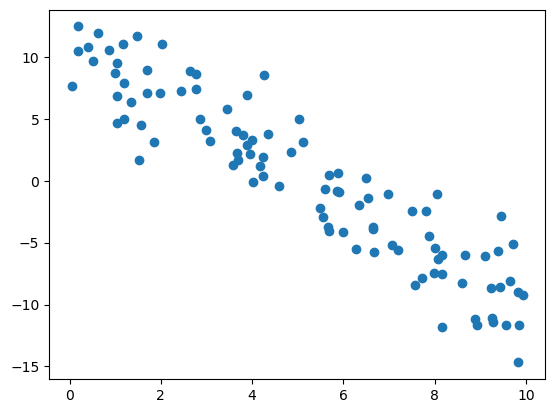

In [97]:
#Nézzük a következő függvényt: y= -2x +10 +zaj

X=np.random.rand(100)*10
y = X*(-2)+10 +np.random.randn(100)*3

plt.scatter(X,y)


[-0.52145091]
RMSE: 6.08571086928689


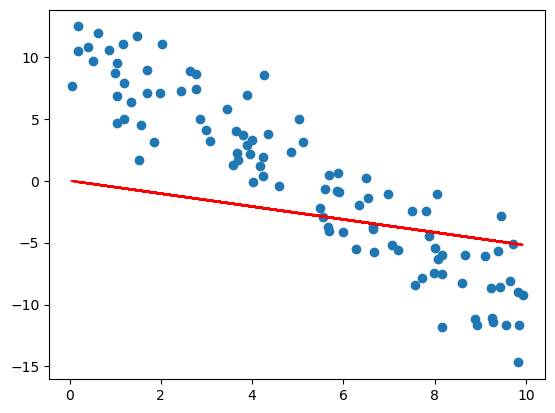

In [99]:
# reshape X to vector
X_v=X.reshape(-1,1)

# calculate theta
theta= np.linalg.inv(X_v.T @ X_v) @ X_v.T @ y
print(theta)

#predict
y_hat= X_v @ theta

#plot

plt.scatter(X_v,y)
plt.plot(X_v,y_hat,color="r")

# számolj hibát

print("RMSE:",np.sqrt(np.sum(np.square(y-y_hat))/y_hat.shape[0]))

(100, 2)
[-2.12599809 11.04137876]
RMSE: 2.5402668498851635


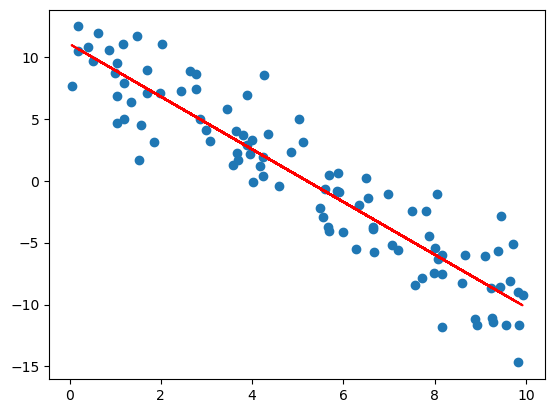

In [108]:
#Tipp: adjunk hozzá egy tanulható konstansot:
X_v=X.reshape(-1,1)
X_v=np.c_[X_v,np.ones(X_v.shape[0])]
print(X_v.shape)

theta2= np.linalg.inv(X_v.T @ X_v) @ X_v.T @y
print(theta2)

y_hat= X_v @ theta2

print("RMSE:",np.sqrt(np.sum(np.square(y-y_hat))/y_hat.shape[0]))

plt.scatter(X_v[:,0],y)
plt.plot(X_v[:,0],y_hat,color="r")

### Analitikus megoldás NumPy-vel

In [125]:
# Bias tag hozzáadása: [1, x]
#X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

# Analitikus megoldás
theta_hat = np.linalg.inv(X.T @ X) @ X_b.T @ y
print(f"Becsült paraméterek: {theta_hat}")

# Előrejelzés
y_pred = X_v @ theta_hat

# Vizualizáció
plt.scatter(X, y, label="Adatok", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Lineáris modell", linewidth=2)
plt.legend()
plt.title("Lineáris regresszió (analitikus megoldás)")
plt.show()


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

### Gradient descent implementáció

Gradient descent súly becslés: [-0.05944377  3.83478699]


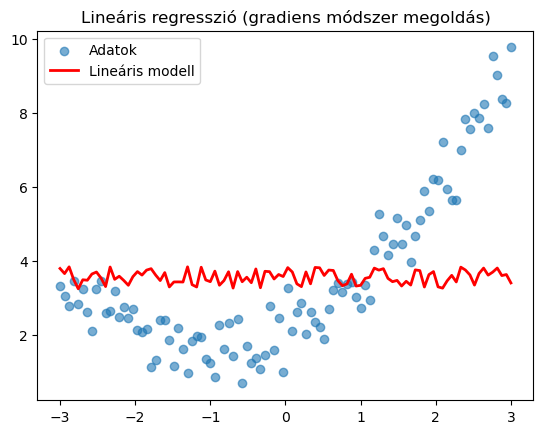

In [141]:
# Gradient Descent paraméterek
alpha = 0.01   # tanulási ráta
n_epochs = 1000
m = X_v.shape[0]

# Inicializálás
theta = np.random.randn(2)

# Iteráció
for epoch in range(n_epochs):
    gradient = (2/m) * X_v.T @ (X_v @ theta - y)
    theta -= alpha * gradient

print(f"Gradient descent súly becslés: {theta}")

plt.scatter(X , y, label="Adatok", alpha=0.6)
plt.plot(X, X_v @ theta, color="red", label="Lineáris modell", linewidth=2)
plt.legend()
plt.title("Lineáris regresszió (gradiens módszer megoldás)")
plt.show()



In [142]:
def calc_theta(x,y):
    return np.linalg.inv(x.T @ x) @x.T @y
def pred(x_,theta_):
    return x_@theta_
def grad_theta(x,y,lr,epoch,grad_delta):
    theta_=np.random.randn(x.shape)
    for i in range(epoch):
        theta_= theta_- lr *grad_delta(theta_,x,y)
    return theta
def rmse(pred,y):
    return np.sqrt(np.sum(np.square(pred-y))/pred.shape[0])
    


Mi a helyzet a következő függvénnyel:                                                       f(x) = 10*sin(x*2)+5 + zaj

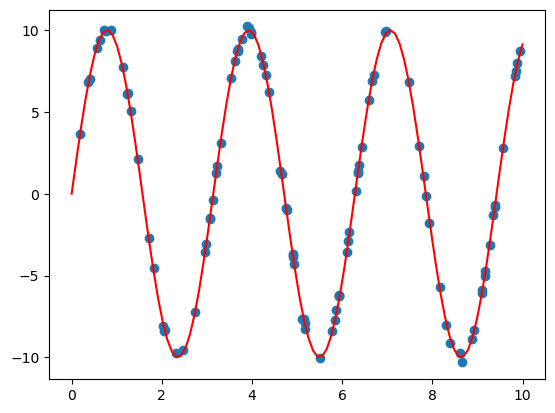

In [147]:
X1=np.linspace(0,10,100)
X=np.random.random(100)*10
zaj=np.random.randn(100)
y1=10*np.sin(X1*2)

Y= 10*np.sin(X*2) +zaj*0.15

plt.plot(X1,y1,color="r")
plt.scatter(X,Y)

rmse:  6.372758969067509


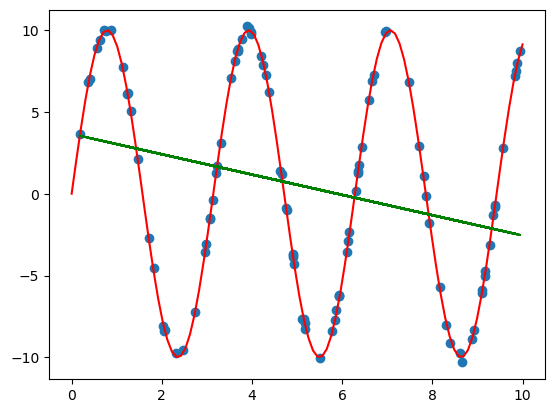

In [149]:

X_v=np.c_[X,np.ones(100)]

theta=calc_theta(X_v,Y)

y_hat=pred(X_v,theta)
print("rmse: ",rmse(y_hat,Y))


plt.plot(X1,y1,color="r")
plt.scatter(X,Y)
plt.plot(X,y_hat,color="g")




A lineáris regresszió csak lineáris kapcsolatokat képes modellezni. 
De mi történik, ha az adataink nemlineárisak?

A **polinomiális regresszió** egy trükk: új jellemzőket (feature-öket) generálunk a meglévőekből úgy, hogy azok hatványait is beemeljük.

Példa: egyváltozós esetben ha van egy `x`, akkor új feature-ök: `x²`, `x³`, ... `xᵈ`.

A modell így is lineáris marad a paraméterekre nézve, de nemlineáris lesz a bemenetre nézve.


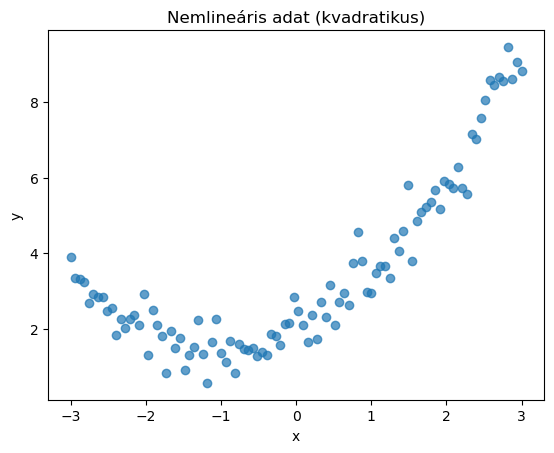

In [184]:
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X[:, 0]**2 + X[:, 0] + 2 + np.random.randn(100) * 0.5

plt.scatter(X, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nemlineáris adat (kvadratikus)")
plt.show()


In [203]:
X_v=np.c_[X**2,X**1,X**0]
X_v.shape
print(np.linalg.cond(X_v.T @ X_v))
## X_v amúgy annyira nem well constructed, pizitiv szdef, de lehet 0 sajátértéke ezért:
k=np.random.rand(1)*0.00000001
print(np.linalg.cond(X_v.T @ X_v +k*np.eye(X_v.shape[1])))


40.548440361086605
40.5484403570201


With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

0.46108742807510206


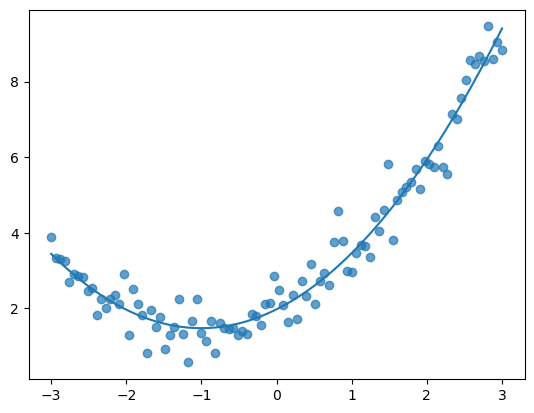

In [206]:
k=np.random.rand(1)*0.00000001
theta=np.linalg.inv(X_v.T @ X_v + k*np.eye(X_v.shape[1])) @X_v.T @y
y_hat=pred(X_v,theta)

plt.scatter(X, y, alpha=0.7)
plt.plot(X,y_hat)
print(rmse(y_hat,y))

1
1.4307231704333614


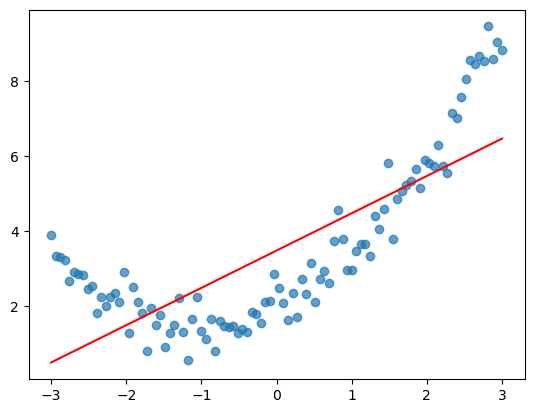

2
0.461087428075102


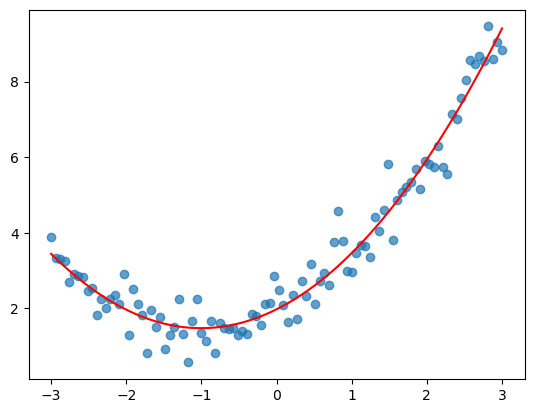

3
0.4605872091647182


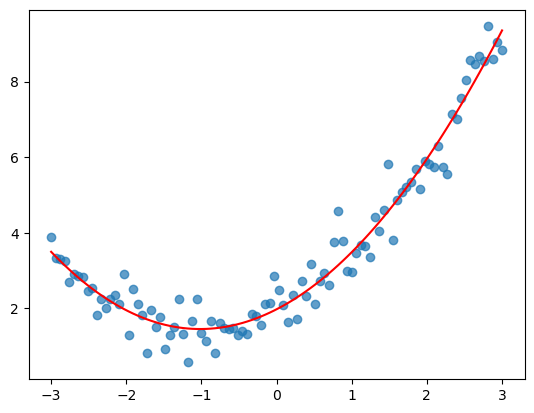

4
0.45801494412623467


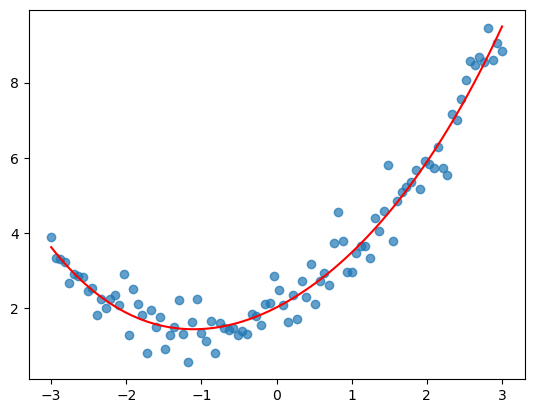

5
0.4576779008876679


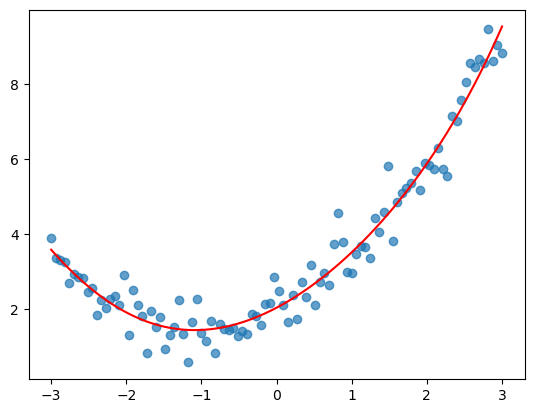

6
0.45677148434532544


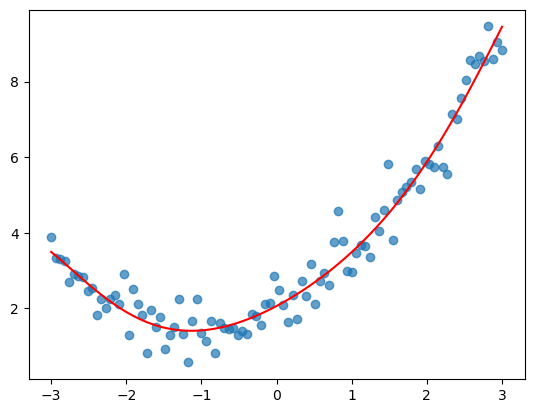

7
0.4428641925243446


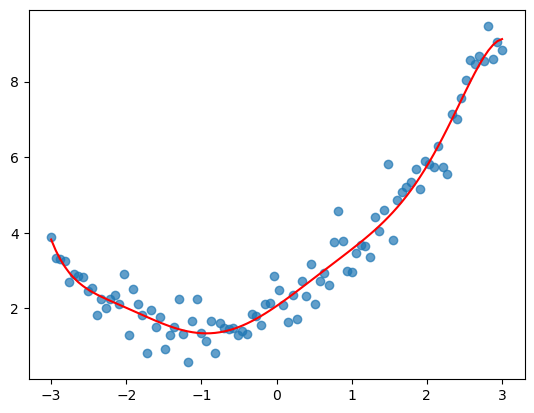

8
0.44055848188635915


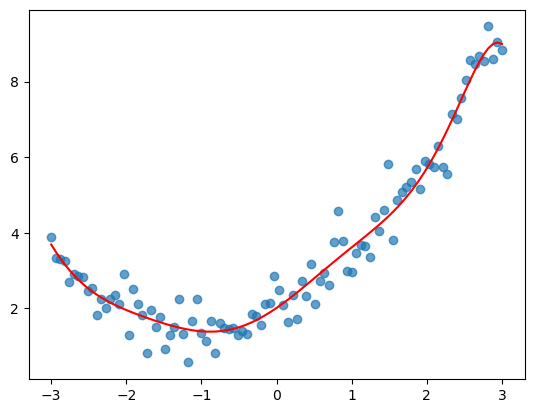

9
0.433446280590116


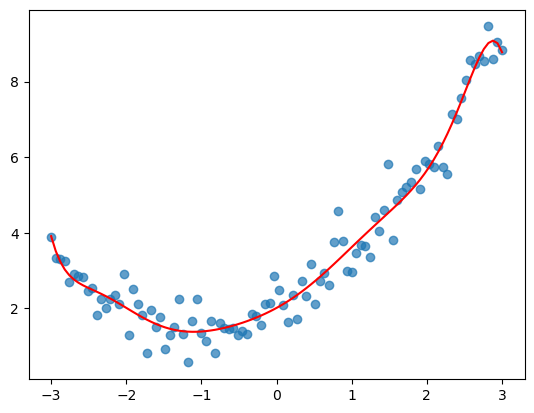

In [216]:
def make_pol_array(X_,num):
    arr=[]
    for i in range(num+1):
        arr.append(X_**i)
    return np.c_[*arr]

for i in range(1,10):
    print(i)
    X_v=make_pol_array(X,i)
    theta=np.linalg.inv(X_v.T @ X_v + k*np.eye(X_v.shape[1])) @X_v.T @y
    y_hat=pred(X_v,theta)

    plt.scatter(X, y, alpha=0.7)    
    plt.plot(X,y_hat,color="r")
    print(rmse(y_hat,y))
    plt.show()

    


In [ ]:
for i in range(1,10):
    print(i)
    X_v=make_pol_array(X,i)
    theta=np.linalg.inv(X_v.T @ X_v + k*np.eye(X_v.shape[1])) @X_v.T @y
    y_hat=pred(X_v,theta)

    plt.scatter(X, y, alpha=0.7)    
    plt.plot(X,y_hat,color="r")
    print(rmse(y_hat,y))
    plt.show()

    


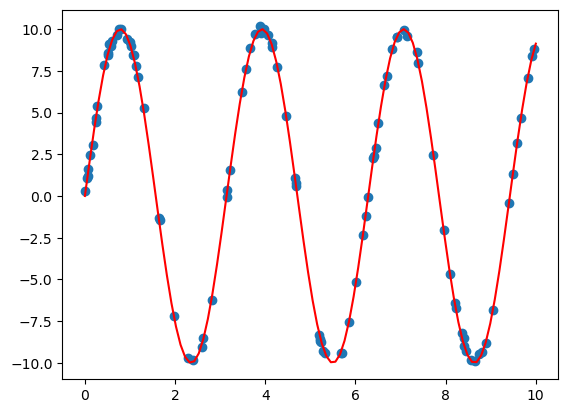

In [219]:
X1=np.linspace(0,10,100)
X=np.random.random(100)*10
zaj=np.random.randn(100)
y1=10*np.sin(X1*2)

Y= 10*np.sin(X*2) +zaj*0.15

plt.plot(X1,y1,color="r")
plt.scatter(X,Y)

1
6.749344073260416


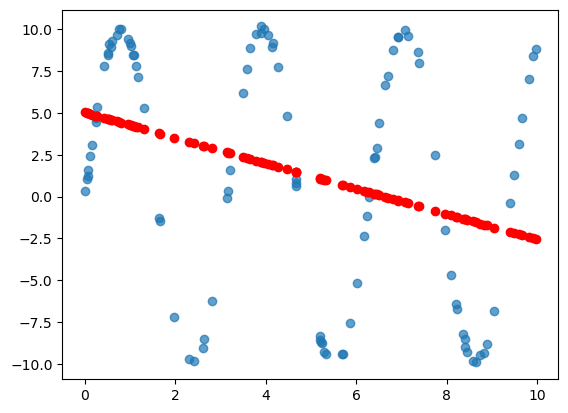

2
6.704623876045058


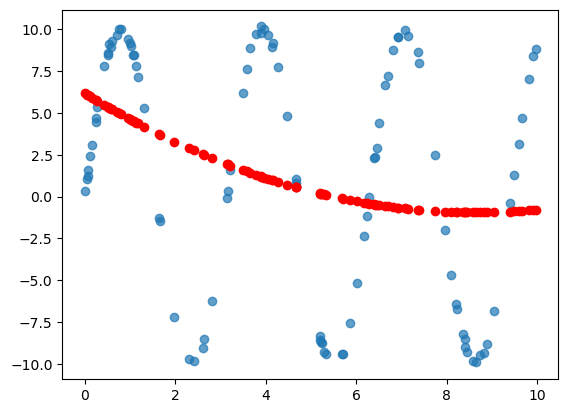

3
6.684855372370416


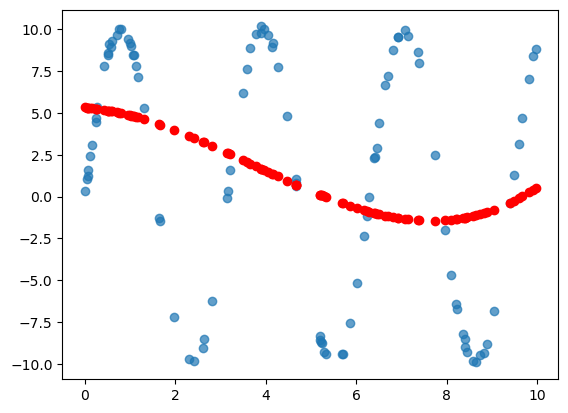

4
6.59396411109867


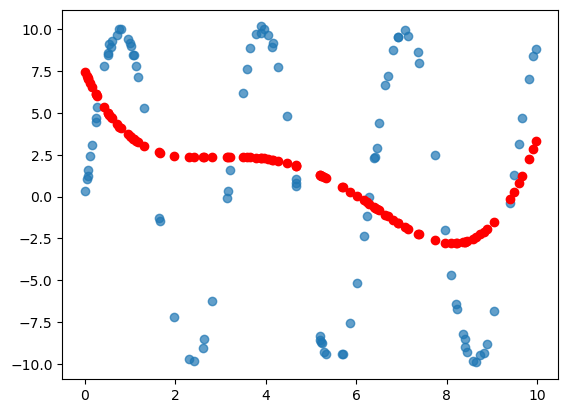

5
6.124085463508724


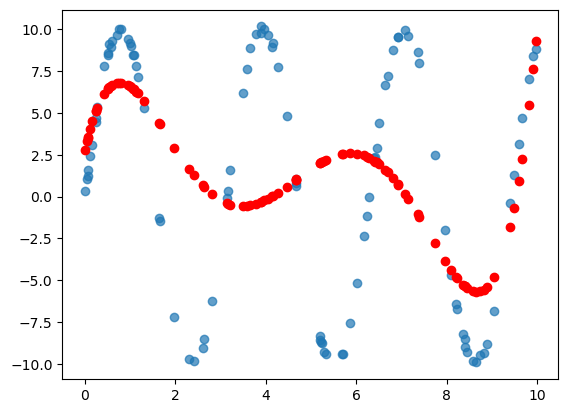

6
6.10578997049097


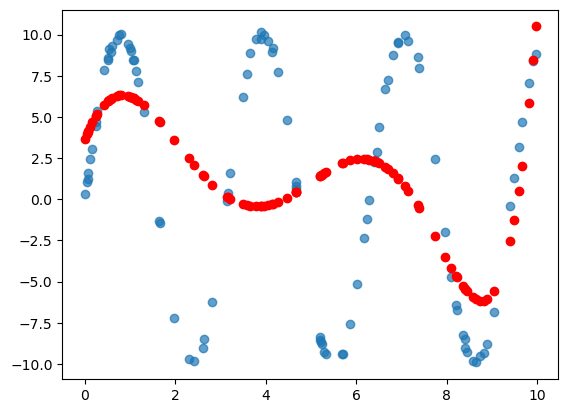

7
5.163207782167591


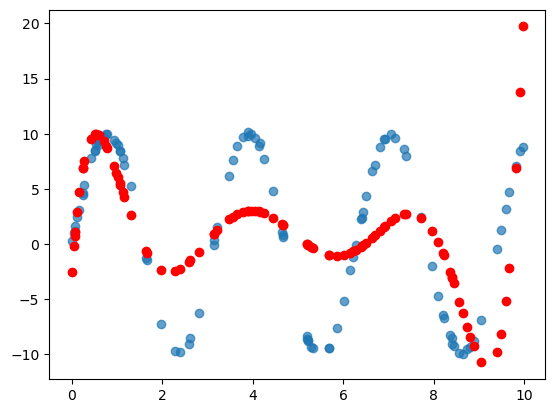

8
4.463444573144139


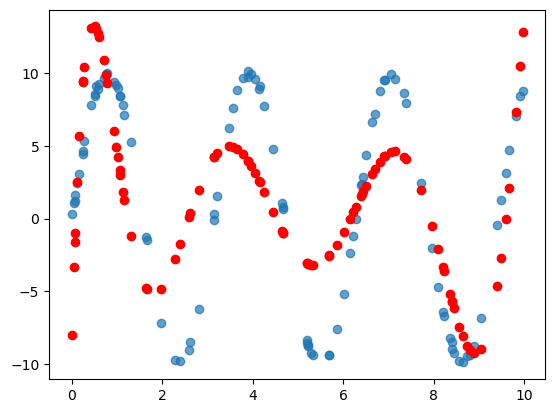

9
2.1539447314713627


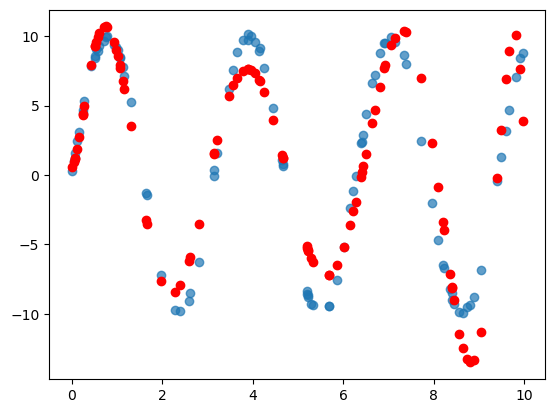

In [238]:
for i in range(1,10):
    print(i)
    X_v=make_pol_array(X.reshape(-1,1),i)
    theta=np.linalg.inv(X_v.T @ X_v + k*np.eye(X_v.shape[1])) @X_v.T @Y
    y_hat=pred(X_v,theta)

    plt.scatter(X, Y, alpha=0.7)    
    plt.scatter(X,y_hat,color="r")
    print(rmse(y_hat,Y))
    plt.show()

    


### Mi az osztályozás?

Az osztályozás célja, hogy egy inputhoz egy diszkrét címkét (kategóriát) rendeljünk. 
Pl.: e-mail spam / nem spam, beteg / egészséges, stb.

Ebben a gyakorlatban bináris osztályozással foglalkozunk: `y ∈ {0, 1}`.
A célunk az, hogy egy adott bemenetre meghatározzuk annak valószínűségét, hogy `y = 1`.

A lineáris modell kiterjesztése: **logisztikus regresszió**.


### Logisztikus regresszió – elmélet

A logisztikus regresszió nem közvetlenül a célváltozót becsli, hanem annak valószínűségét:

$$
P(y=1|x) = \sigma(x^\top \theta) = \frac{1}{1 + e^{-x^\top \theta}}
$$

A $$ \sigma(z) $$ függvényt **szigmoid függvénynek** nevezzük.

A tanulási cél: minimalizálni a **log loss-t** (más néven cross-entropy):

$$
L(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$
ahol $$ \hat{y}^{(i)} = \sigma(x^{(i)T} \theta) $$


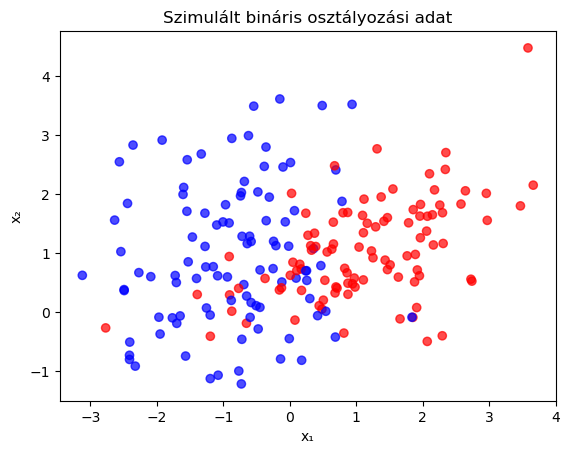

In [24]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 2D-s adat, két osztály
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Szimulált bináris osztályozási adat")
plt.show()


Intercept: [0.18734723]
Koeficiens: [[ 1.81773105 -0.40929647]]


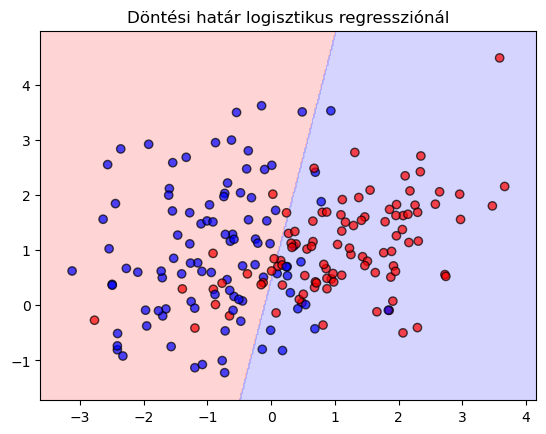

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Modell tanítása
model = LogisticRegression()
model.fit(X, y)

# Paraméterek
print("Intercept:", model.intercept_)
print("Koeficiens:", model.coef_)

# Előrejelzés
probs = model.predict_proba(X)[:, 1]
preds = model.predict(X)

# Döntési határ vizualizálása
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.title("Döntési határ logisztikus regressziónál")
plt.show()
